<a href="https://colab.research.google.com/github/GayathriKalluri/UnEmployement_Analysis/blob/main/UnEmployement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline
import calendar

In [2]:
import datetime as dt

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
df.shape

(267, 9)

In [10]:
df.isna().values.any()

False

In [11]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [14]:
df.shape

(267, 9)

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [17]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

<ipython-input-19-54270d55c025>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-19-54270d55c025>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


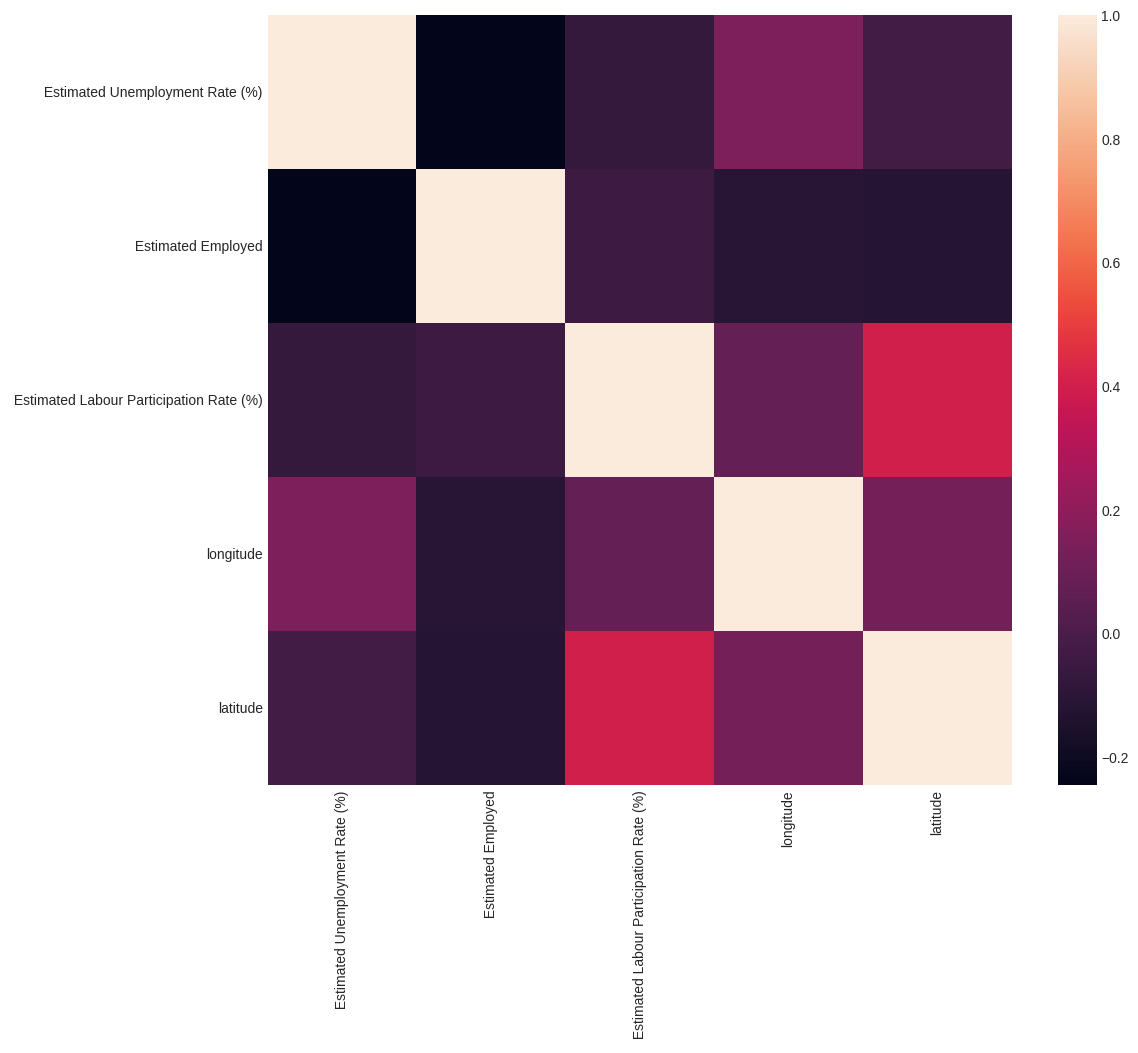

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())
plt.show()

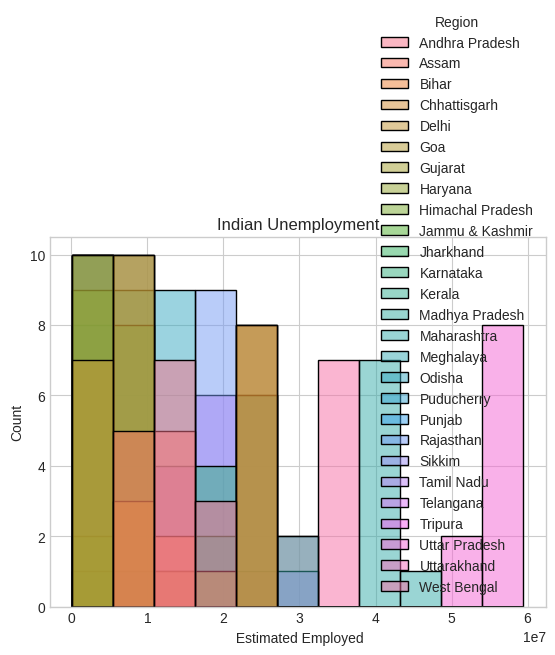

In [21]:
df.columns= ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude']
plt.title("Indian Unemployment")
sns.histplot(x=' Estimated Employed', hue="Region", data=df)
plt.show()

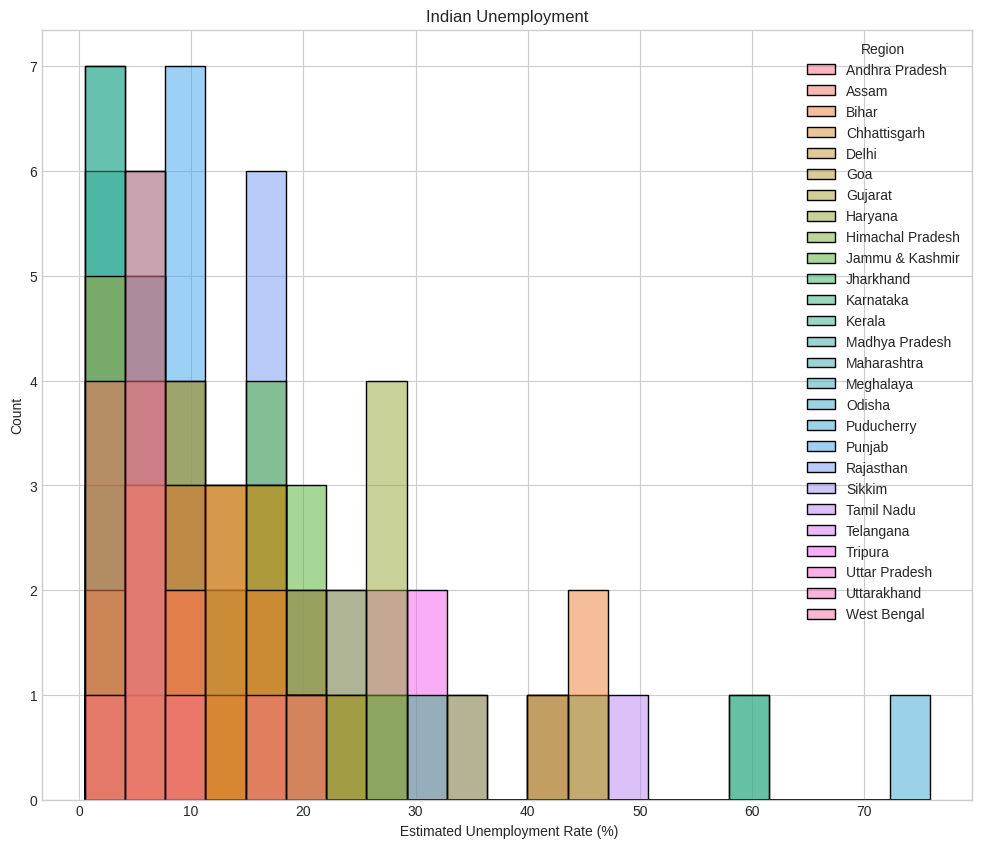

In [22]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x=' Estimated Unemployment Rate (%)', hue="Region", data=df)
plt.show()

In [24]:
unemploment = df[['Region', 'Region.1', ' Estimated Unemployment Rate (%)']]
figure = px.sunburst(unemploment, path=['Region.1', 'Region'],
                     values=' Estimated Unemployment Rate (%)',
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

In [25]:
# to print the state with highest unemployment
print("State with highest Unemployment:-",df['Region'].value_counts().idxmax())

State with highest Unemployment:- Andhra Pradesh


In [26]:
# to print the state with lowest unemployment
print("State with Lowest Unemployment:-",df['Region'].value_counts().idxmin())

State with Lowest Unemployment:- Sikkim


In [28]:
import datetime as dt
import calendar

df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)

In [30]:
df[' Date']

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
262   2020-06-30
263   2020-07-31
264   2020-08-31
265   2020-09-30
266   2020-10-31
Name:  Date, Length: 267, dtype: datetime64[ns]

In [31]:
df['month_int'] =  df[' Date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [32]:
df["month_int"]

0       1
1       2
2       3
3       4
4       5
       ..
262     6
263     7
264     8
265     9
266    10
Name: month_int, Length: 267, dtype: int64

In [33]:
df["month"]

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
262    Jun
263    Jul
264    Aug
265    Sep
266    Oct
Name: month, Length: 267, dtype: object

In [34]:
#to print the month with highest unemployment

print("Month with highest Unemployment:-",df['month'].value_counts().idxmax())

Month with highest Unemployment:- Mar


In [35]:
print("Month with lowest Unemployment:-",df['month'].value_counts().idxmin())

Month with lowest Unemployment:- Jan


In [36]:
df.drop(columns=[' Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,Sep


In [38]:
#top 10 states with highest unemployment

df1=df[['Region',' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(by=' Estimated Unemployment Rate (%)',ascending=False)

In [39]:
df1.head(10)

,Estimated Unemployment Rate (%)
Region,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


Text(0, 0.5, 'Number of people unemployed in %')

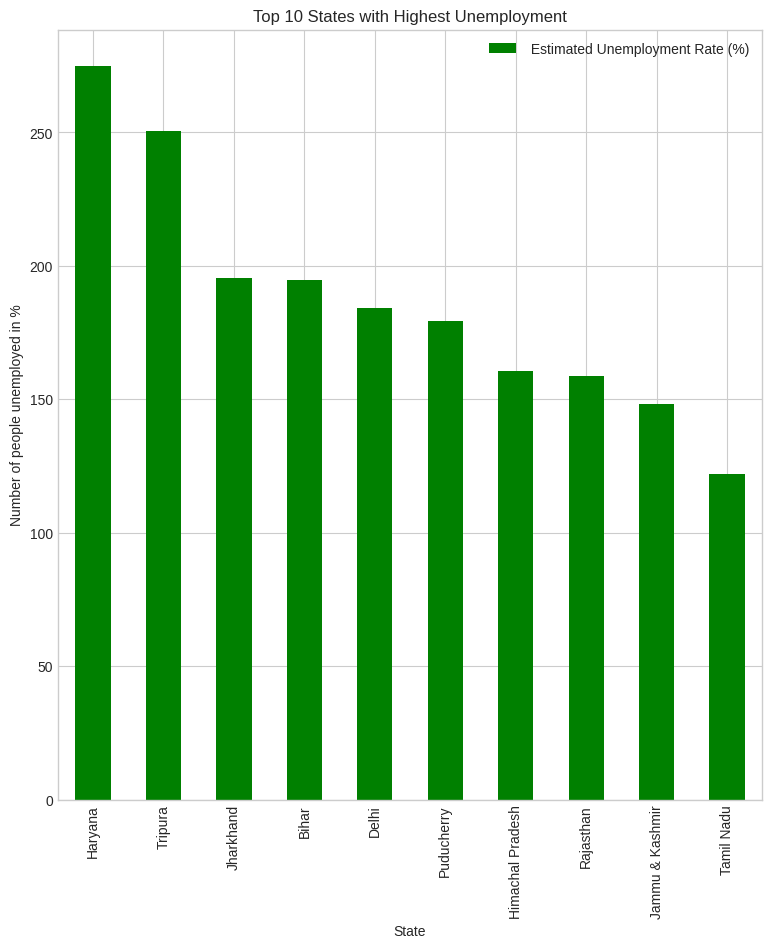

In [40]:
fig=plt.figure()
plot =fig.add_subplot(1,2,1)
df1[:10].plot(kind="bar",color="green",figsize=(20,10),ax=plot)
plot.set_title("Top 10 States with Highest Unemployment")
plot.set_xlabel("State")
plot.set_ylabel("Number of people unemployed in %")

In [41]:
df2 = df[["month"," Estimated Unemployment Rate (%)"]].groupby("month").sum().sort_values(by=" Estimated Unemployment Rate (%)", ascending  =False)
df2.head(10)

,Estimated Unemployment Rate (%)
month,
May,627.60
Apr,578.14
Jun,294.60
Mar,291.13
Aug,278.46
Jul,265.53
Feb,240.92
Jan,239.11
Sep,235.06


Text(0, 0.5, 'Number of People Unemployed (in %)')

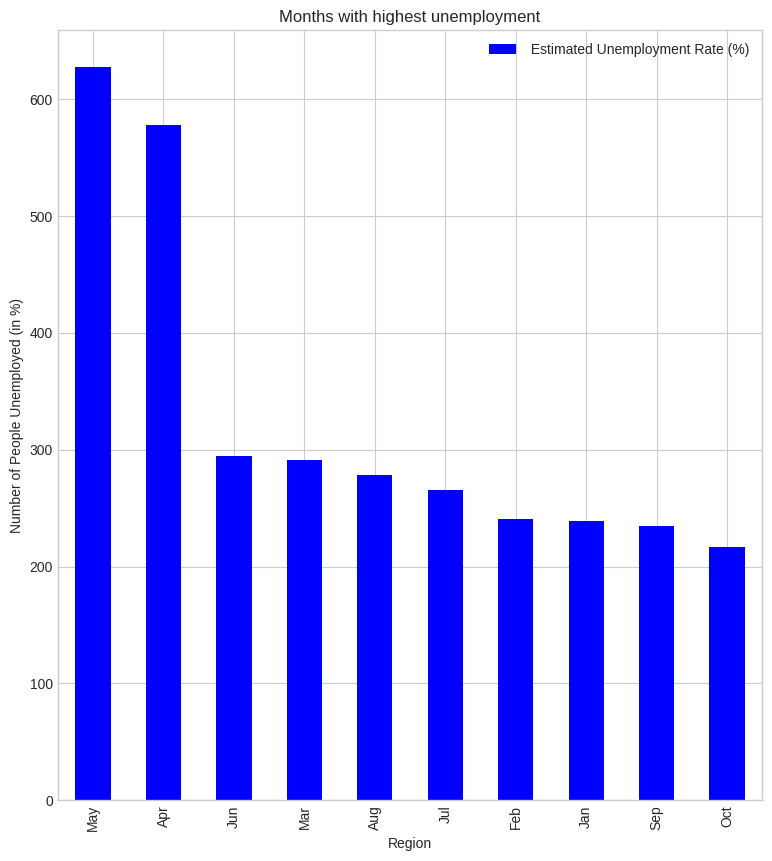

In [42]:
fig=plt.figure()
plot2=fig.add_subplot(1,2,1)
df2[:12].plot(kind="bar",color="blue",figsize=(20,10),ax=plot2)
plot2.set_title("Months with highest unemployment")
plot2.set_xlabel("Region")
plot2.set_ylabel("Number of People Unemployed (in %)")

In [43]:
IND =  df.groupby(["month"])[[' Estimated Unemployment Rate (%)', " Estimated Employed", " Estimated Labour Participation Rate (%)"]].mean()
IND = pd.DataFrame(IND).reset_index()
month = IND.month
unemployment_rate = IND[" Estimated Unemployment Rate (%)"]
labour_participation_rate = IND[" Estimated Labour Participation Rate (%)"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

Text(0, 0.5, 'Number of People Employed (in %)')

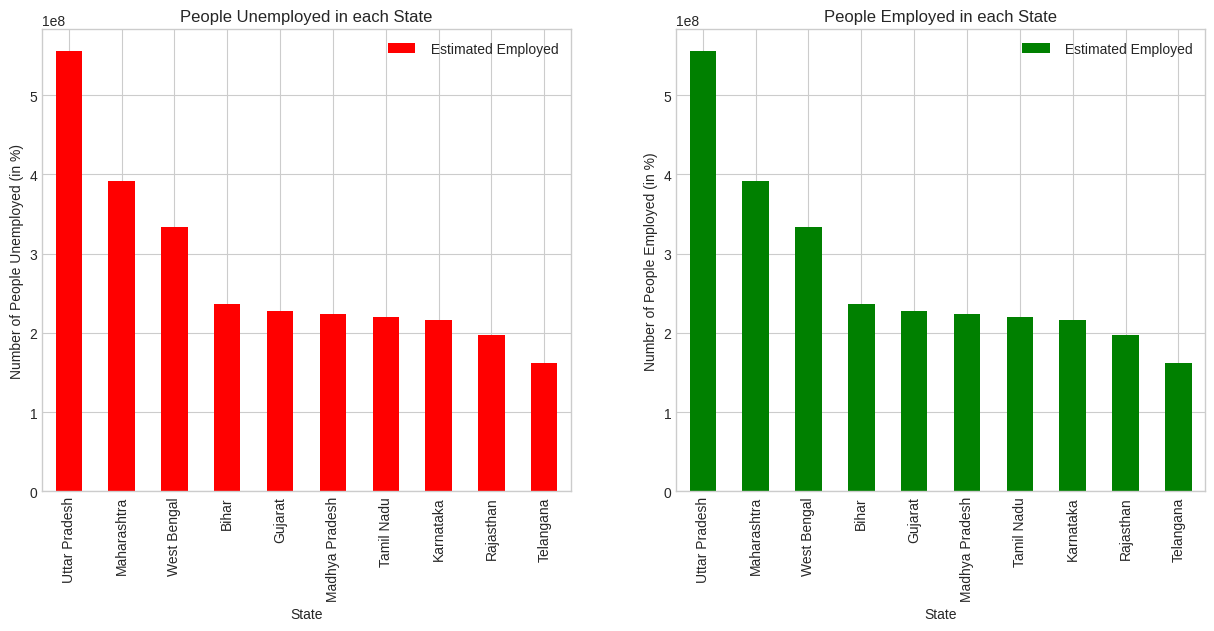

In [45]:
df1 = df[["Region"," Estimated Employed"]].groupby("Region").sum().sort_values(by=" Estimated Employed", ascending =False)
df1.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Unemployed
df1[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each State")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of People Unemployed (in %)")

#Employed
df1[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Employed in each State")
ax1.set_xlabel("State")
ax1.set_ylabel("Number of People Employed (in %)")

In [46]:
fig = px.bar(df, x='Region',y=' Estimated Unemployment Rate (%)', animation_frame = 'month', color='Region',
            title='Unemployment rate (Region)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()